<a href="https://colab.research.google.com/github/msafirta/MERFISH_imputed_genes_IC/blob/main/Copy_of_MERFISH_imputed_gene_IC_NPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allen Brain Cell Atlas Use Case
This notebook is an example of how to use data from the Allen Brain Cell (ABC) Atas. Code for this notebook comes from [ABC Atlas Access](https://alleninstitute.github.io/abc_atlas_access/intro.html), which features in depth tutorials on ABC Atlas scRNAseq and MERFISH datasets. Use ABC Atlas Access to learn more about each of the datasets. The text following '#' are comments and/or indicate where the code can be edited to look at different brain regions, cell types, etc. This notebook is intended to be used in Google Colab.

## Use Case Description
This code aims to determine gene expression muscrinic cells (M1, M2, M3, M5) in the inferior colliculus (IC). Using the ABC Atlas, we are looking at spatial transcriptomic mouse data— their genes of interest were not in the orginal 500-gene panel, however, they find their genes in the imputed gene dataset (from scRNAseq data). This dataset is titled "MERFISH-C57BL6J-638850 with Imputed Genes + Reconstructed Coordinates." [Here](https://knowledge.brain-map.org/abcatlas#AQEBSzlKTjIzUDI0S1FDR0s5VTc1QQACSFNZWlBaVzE2NjlVODIxQldZUAADBAE0TVY3SEE1REcyWEpaM1VEOEc5AAIBR2x1dAAAATczR1ZURFhERUdFMjdNMlhKTVQAAgAAAUk5TE5QME8xUk44SzRTTjJHV1kAAgFDQTEAAAFURlFGTE5FUDNWMjIyWTg4QzY0AAIAAAQBAAKCdtVCg3oWcwOCLM2egqrYLgQyTlFUSUU3VEFNUDhQUUFITzRQAAWBr6ZKgemsDoGggUeAktXoBgAHAAAFAgFDaHJuYTcAAAFDaHJtMQAABgEAAkNocm5hNwADfgAAAAQABXUAgC%2BCAIAuBshTBwIjRkZGRkZGAAMABkdFTkUABwAIAgAACFZGT0ZZUEZRR1JLVURRVVozRkYACUxWREJKQVc4Qkk1WVNTMVFVQkcACgALAVRMT0tXQ0w5NVJVMDNEOVBFVEcAAjczR1ZURFhERUdFMjdNMlhKTVQAAwEEAQACIzAwMDAwMAADyAEABQEBAiMwMDAwMDAAA8gBAAAAAgEA) are the cells and genes they are studying in the ABC Atlas.

Goal: plot gene expression of imputed genes Chrm1, Chrm2, Chrm3, and Chrm5 in GABAergic neurons in IC.

In [ ]:
# Install s3fs package
!apt install s3fs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  s3fs
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 297 kB of archives.
After this operation, 794 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 s3fs amd64 1.90-1 [297 kB]
Fetched 297 kB in 6s (46.2 kB/s)
Selecting previously unselected package s3fs.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack .../archives/s3fs_1.90-1_amd64.deb ...
Unpacking s3fs (1.90-1) ...
Setting up s3fs (1.90-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
# Make directory to mount s3 data into
!mkdir -p /data/abc_atlas

In [ ]:
# Mount the s3 bucket using s3fs-fuse
!s3fs -o public_bucket=1 -o default_acl=public-read -o endpoint="us-west-2" allen-brain-cell-atlas /data/abc_atlas

In [ ]:
# Check that it's mounted
!ls -ltrh /data/abc_atlas

total 35K
drwxr-x--- 1 root root   0 Dec 31  1969 releases
drwxr-x--- 1 root root   0 Dec 31  1969 metadata
drwxr-x--- 1 root root   0 Dec 31  1969 mapmycells
drwxr-x--- 1 root root   0 Dec 31  1969 image_volumes
drwxr-x--- 1 root root   0 Dec 31  1969 expression_matrices
-rw-r----- 1 root root 32K Jun  7  2023 index.html


In [ ]:
# Install abc_atlas_access
%pip install "abc_atlas_access[notebooks] @ git+https://github.com/alleninstitute/abc_atlas_access.git"

  Cloning https://github.com/alleninstitute/abc_atlas_access.git to /tmp/pip-install-46rvig4_/abc-atlas-access_683eacf1706c4312ba12ffa13f903ede
  Running command git clone --filter=blob:none --quiet https://github.com/alleninstitute/abc_atlas_access.git /tmp/pip-install-46rvig4_/abc-atlas-access_683eacf1706c4312ba12ffa13f903ede
  Resolved https://github.com/alleninstitute/abc_atlas_access.git to commit 398c9cc557a4b1e75dc68dd3d4965d3ed50367b2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [ ]:
from pathlib import Path
from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [ ]:
download_base = Path('/data/abc_atlas')
abc_cache = AbcProjectCache.from_local_cache(download_base)

abc_cache.current_manifest

/usr/local/lib/python3.11/dist-packages/abc_atlas_access/abc_atlas_cache/cloud_cache.py:470: MissingLocalManifestWarning: This cache directory appears to contain data files, but it has no record of what those files are. Unless running as a LocalCache, files will be re-downloaded.
  warnings.warn(msg, MissingLocalManifestWarning)
/usr/local/lib/python3.11/dist-packages/abc_atlas_access/abc_atlas_cache/cloud_cache.py:1373: ReadOnlyLocalCacheWarning: LocalCache is a read only directory and cannot
                save the last used manifest.
                Current Manifest: releases/20250531/manifest.json
  warnings.warn(


'releases/20250531/manifest.json'

In [ ]:
abc_cache.list_directories

['ASAP-PMDBS-10X',
 'ASAP-PMDBS-taxonomy',
 'Allen-CCF-2020',
 'HMBA-10xMultiome-BG',
 'HMBA-10xMultiome-BG-Aligned',
 'HMBA-BG-taxonomy-CCN20250428',
 'MERFISH-C57BL6J-638850',
 'MERFISH-C57BL6J-638850-CCF',
 'MERFISH-C57BL6J-638850-imputed',
 'MERFISH-C57BL6J-638850-sections',
 'SEAAD',
 'SEAAD-taxonomy',
 'WHB-10Xv3',
 'WHB-taxonomy',
 'WMB-10X',
 'WMB-10XMulti',
 'WMB-10Xv2',
 'WMB-10Xv3',
 'WMB-neighborhoods',
 'WMB-taxonomy',
 'Zeng-Aging-Mouse-10Xv3',
 'Zeng-Aging-Mouse-WMB-taxonomy',
 'Zhuang-ABCA-1',
 'Zhuang-ABCA-1-CCF',
 'Zhuang-ABCA-2',
 'Zhuang-ABCA-2-CCF',
 'Zhuang-ABCA-3',
 'Zhuang-ABCA-3-CCF',
 'Zhuang-ABCA-4',
 'Zhuang-ABCA-4-CCF']

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [ ]:
# Edit the notebook from here onward
# Load metadata for cell dataset
cell = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850', # To change dataset, enter the directory name from the list above (abc_cache.list_directories). If using imputed genes, use 'MERFISH-C57BL6J-638850'
    file_name='cell_metadata_with_cluster_annotation',
    dtype={"cell_label": str,
           "neurotransmitter": str}
)
cell.set_index('cell_label', inplace=True)

In [ ]:
# filter cells for neurotransmitter type and show first 5 cells in table
NT_cells = cell[cell['neurotransmitter'] == 'GABA'] # 'GABA' change neurotransmitter here
NT_cells.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,
1018093344101400358-4,C57BL6J-638850.33,3155,0.504776,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.441577,6.464796,5.8,GABA,20 MB GABA,197 SNr Six3 Gaba,0806 SNr Six3 Gaba_1,3464 SNr Six3 Gaba_1,#FF3358,#9EF01A,#7A5C99,#2E995C,#62CC00
1017092617102560597,C57BL6J-638850.38,1258,0.542498,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.175661,6.082802,6.8,GABA,05 OB-IMN GABA,039 OB Meis2 Thsd7b Gaba,0143 OB Meis2 Thsd7b Gaba_1,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945
1104095349102280703,C57BL6J-638850.52,1258,0.527005,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.644348,7.696379,9.8,GABA,05 OB-IMN GABA,039 OB Meis2 Thsd7b Gaba,0143 OB Meis2 Thsd7b Gaba_1,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945
1017155956100650356,C57BL6J-638850.50,1258,0.691000,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.889727,7.462066,9.4,GABA,05 OB-IMN GABA,039 OB Meis2 Thsd7b Gaba,0143 OB Meis2 Thsd7b Gaba_1,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945
1104095349102440200-3,C57BL6J-638850.52,1258,0.669169,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.806380,7.547507,9.8,GABA,05 OB-IMN GABA,039 OB Meis2 Thsd7b Gaba,0143 OB Meis2 Thsd7b Gaba_1,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945


In [ ]:
# get reconstructed x,y,z coordinates for each cell — this is needed anatomical regions. Show first 5 cells in table
reconstructed_coords = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850-CCF',
    file_name='reconstructed_coordinates',
    dtype={"cell_label": str}
)
reconstructed_coords.rename(columns={'x': 'x_reconstructed',
                                     'y': 'y_reconstructed',
                                     'z': 'z_reconstructed'}, # Loads 3D Constructed spatial coordinates for cell
                            inplace=True)
reconstructed_coords.set_index('cell_label', inplace=True)
reconstructed_coords.head(5)

,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index
cell_label,,,,
1019171911101460569,7.143894,7.890964,0.8,945
1019171911101550321,4.188673,7.962972,0.8,945
1019171911100841066,6.859447,5.908534,0.8,893
1019171911101400425,3.952014,7.564086,0.8,842
1019171911101380264,2.803546,7.221688,0.8,0


In [ ]:
# add coordinates for each cell to table and show first 5 cells in table
cell_joined = NT_cells.join(reconstructed_coords, how='inner')
cell_joined.head(5) # Merges cell metadata with spatial coordinates

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index
cell_label,,,,,,,,,,,,,,,,,,,,,
1018093344101400358-4,C57BL6J-638850.33,3155,0.504776,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.441577,6.464796,5.8,...,3464 SNr Six3 Gaba_1,#FF3358,#9EF01A,#7A5C99,#2E995C,#62CC00,4.446538,6.117442,5.8,687
1017092617102560597,C57BL6J-638850.38,1258,0.542498,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.175661,6.082802,6.8,...,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945,8.093125,6.110577,6.8,5
1104095349102280703,C57BL6J-638850.52,1258,0.527005,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.644348,7.696379,9.8,...,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945,7.596676,7.463540,9.8,688
1017155956100650356,C57BL6J-638850.50,1258,0.691000,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.889727,7.462066,9.4,...,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945,7.906556,7.408553,9.4,951
1104095349102440200-3,C57BL6J-638850.52,1258,0.669169,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.806380,7.547507,9.8,...,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945,7.738014,7.334997,9.8,951


In [ ]:
# get anatomical regions and show first 5 cells in table
parcellation_annotation = abc_cache.get_metadata_dataframe(directory='Allen-CCF-2020',
                                                           file_name='parcellation_to_parcellation_term_membership_acronym')
parcellation_annotation.set_index('parcellation_index', inplace=True)
parcellation_annotation.columns = ['parcellation_%s'% x for x in  parcellation_annotation.columns]
parcellation_annotation.head(5)

,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure
parcellation_index,,,,,
0,unassigned,unassigned,unassigned,unassigned,unassigned
1,brain,grey,HY,TMv,TMv
2,brain,grey,Isocortex,SSp-m,SSp-m6b
5,brain,fiber tracts,lfbs,cst,int
6,brain,grey,P,PSV,PSV


In [ ]:
# Load and format color annotations for anatomical regions

#Load a metadata file that maps brain region (parcellation index) to a color
parcellation_color = abc_cache.get_metadata_dataframe(directory='Allen-CCF-2020',
                                                      file_name='parcellation_to_parcellation_term_membership_color')
parcellation_color.set_index('parcellation_index', inplace=True) #Set 'parcellation_index' as row index name
parcellation_color.columns = ['parcellation_%s'% x for x in  parcellation_color.columns] #Rename columns
parcellation_color.head(5) #Show first 5 rows

,parcellation_organ_color,parcellation_category_color,parcellation_division_color,parcellation_structure_color,parcellation_substructure_color
parcellation_index,,,,,
0,#000000,#000000,#000000,#000000,#000000
1,#FFFFFF,#BFDAE3,#E64438,#FF4C3E,#FF4C3E
2,#FFFFFF,#BFDAE3,#70FF71,#188064,#188064
5,#FFFFFF,#CCCCCC,#CCCCCC,#CCCCCC,#CCCCCC
6,#FFFFFF,#BFDAE3,#FF9B88,#FFAE6F,#FFAE6F


In [ ]:
# add anatomical regions to table and show first 5 cells in table
cell_joined = cell_joined.join(parcellation_annotation, on='parcellation_index')
cell_joined.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,cluster_color,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure
cell_label,,,,,,,,,,,,,,,,,,,,,
1018093344101400358-4,C57BL6J-638850.33,3155,0.504776,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.441577,6.464796,5.8,...,#62CC00,4.446538,6.117442,5.8,687,brain,fiber tracts,cm,drt,ml
1017092617102560597,C57BL6J-638850.38,1258,0.542498,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.175661,6.082802,6.8,...,#994945,8.093125,6.110577,6.8,5,brain,fiber tracts,lfbs,cst,int
1104095349102280703,C57BL6J-638850.52,1258,0.527005,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.644348,7.696379,9.8,...,#994945,7.596676,7.463540,9.8,688,brain,grey,OLF,OLF-unassigned,OLF-unassigned
1017155956100650356,C57BL6J-638850.50,1258,0.691000,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.889727,7.462066,9.4,...,#994945,7.906556,7.408553,9.4,951,brain,grey,OLF,PIR,PIR
1104095349102440200-3,C57BL6J-638850.52,1258,0.669169,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.806380,7.547507,9.8,...,#994945,7.738014,7.334997,9.8,951,brain,grey,OLF,PIR,PIR


In [ ]:
# Determine how brain region of interest is labeled
structures = cell_joined["parcellation_structure"].unique()
for s in sorted(structures):
    print(s) # copy correct abbreviation for following functions

AAA
ACAd
ACAv
ACB
ADP
AHN
AId
AIp
AIv
AM
AMB
AN
AOB
AON
AP
APN
APr
AQ
ARH
ASO
AT
AUDd
AUDp
AUDpo
AUDv
AV
AVP
AVPV
B
BA
BLA
BMA
BST
CA1
CA2
CA3
CB-unassigned
CEA
CENT
CL
CLA
CLI
COAa
COAp
COPY
CP
CS
CTXsp-unassigned
CU
CUL
CUN
DCO
DEC
DG
DMH
DN
DP
DR
DT
DTN
ECT
ENTl
ENTm
EPd
EPv
EW
Eth
FC
FL
FN
FOTU
FRP
FS
GPe
GPi
GRN
GU
HATA
HPF-unassigned
HY-unassigned
IA
IAM
IC
ICB
IF
IG
IGL
III
IIIn
IIn
ILA
IMD
IP
IPN
IRN
IV
IVn
In
IntG
LA
LAV
LD
LDT
LGd
LGv
LH
LHA
LING
LM
LP
LPO
LRN
LSc
LSr
LSv
LT
MA
MA3
MB-unassigned
MD
ME
MEA
MEPO
MG
MH
MM
MOB
MOp
MOs
MPN
MPO
MPT
MRN
MS
MT
MV
MY-unassigned
NB
NDB
NI
NLL
NLOT
NOD
NOT
NPC
NTB
NTS
OLF-unassigned
OP
ORBl
ORBm
ORBvl
OT
OV
P-unassigned
PA
PAA
PAG
PAL-unassigned
PAR
PARN
PB
PBG
PCG
PCN
PD
PDTg
PERI
PF
PFL
PG
PGRNd
PGRNl
PH
PIL
PIR
PL
PMv
PN
PO
POL
POST
PP
PPN
PPT
PPY
PR
PRE
PRM
PRNc
PRNr
PRP
PS
PST
PSTN
PSV
PT
PVH
PVHd
PVT
PVa
PVi
PVp
PVpo
PYR
Pa4
Pa5
PeF
PoT
ProS
RCH
RE
RL
RM
RN
RPA
RPF
RPO
RR
RSPagl
RSPd
RSPv
RT
SAG
SBPV
SCH
SCO
SCm
SCs
SEZ
SF
SFO
SG


In [ ]:
# filter for cells in anatomical division and show first 5 cells in table
cell_joined[cell_joined["parcellation_structure"]== 'IC']
# 'IC' change anatomical division here, 'parcellation_structure' change anatomical level here
# from ABC Atlas, anatomical division = parcellation_division, anatomical structure = parcellation_structure, anatomical substructure = parcellation_substructure
cell_joined.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,cluster_color,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure
cell_label,,,,,,,,,,,,,,,,,,,,,
1018093344101400358-4,C57BL6J-638850.33,3155,0.504776,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.441577,6.464796,5.8,...,#62CC00,4.446538,6.117442,5.8,687,brain,fiber tracts,cm,drt,ml
1017092617102560597,C57BL6J-638850.38,1258,0.542498,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.175661,6.082802,6.8,...,#994945,8.093125,6.110577,6.8,5,brain,fiber tracts,lfbs,cst,int
1104095349102280703,C57BL6J-638850.52,1258,0.527005,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.644348,7.696379,9.8,...,#994945,7.596676,7.463540,9.8,688,brain,grey,OLF,OLF-unassigned,OLF-unassigned
1017155956100650356,C57BL6J-638850.50,1258,0.691000,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.889727,7.462066,9.4,...,#994945,7.906556,7.408553,9.4,951,brain,grey,OLF,PIR,PIR
1104095349102440200-3,C57BL6J-638850.52,1258,0.669169,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.806380,7.547507,9.8,...,#994945,7.738014,7.334997,9.8,951,brain,grey,OLF,PIR,PIR


In [ ]:
# get gene expression values from cell dataset
imputed_h5ad_path = abc_cache.get_data_path('MERFISH-C57BL6J-638850-imputed', 'C57BL6J-638850-imputed/log2')
# change cell dataset here.
adata = anndata.read_h5ad(imputed_h5ad_path, backed='r')
gene_list = ['Npy'] # edit genes here

In [ ]:
# get ensemble IDs of genes of interest
pred = [x in gene_list for x in adata.var.gene_symbol]
gene_filtered = adata.var[pred]
gene_filtered

,gene_symbol
gene_identifier,
ENSMUSG00000029819,Npy


In [ ]:
# get gene expression values for genes of interest and show first 5 cells in table
gene_subset = adata[:, gene_filtered.index].to_df()
adata.file.close()
del adata

gene_subset.rename(columns=gene_filtered.to_dict()['gene_symbol'], inplace=True)
gene_subset.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


gene_identifier,Npy
cell_label,
1104095349100540743-1,1.057617
1018093345100600265,1.247070
1018135614102090183,1.339844
1104095348100570634,1.058594
1018122109102452991,1.065430


In [ ]:
# add genes of interest to cell table
genes_of_interest = cell_joined.join(gene_subset, on='cell_label', how='inner') #merges gene expression values into cell metadata

In [ ]:
# filter cell table for anatomical region
cell_table = genes_of_interest[genes_of_interest["parcellation_structure"]== 'IC']
# 'IC' change anatomical region here, 'parcellation_structure' change anatomical level here

In [ ]:
# show all metadata for first 5 cells
cell_table.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,Npy
cell_label,,,,,,,,,,,,,,,,,,,,,
1018093344101450289-1,C57BL6J-638850.15,4167,0.528230,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.884712,3.639677,2.8,...,4.945992,3.535219,2.8,810,brain,grey,MB,IC,ICd,0.000000
1018093344100990479-3,C57BL6J-638850.18,4170,0.693629,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.264717,3.023614,3.4,...,6.299144,2.772921,3.4,810,brain,grey,MB,IC,ICd,0.000000
1018093344101620738-1,C57BL6J-638850.17,4170,0.690500,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.776003,2.652793,3.2,...,5.811133,2.867484,3.2,810,brain,grey,MB,IC,ICd,0.030441
1018093344102060244-1,C57BL6J-638850.17,3329,0.609328,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.081130,2.788188,3.2,...,7.069739,2.981044,3.2,818,brain,grey,MB,IC,ICe,1.879883
1017092617201390347,C57BL6J-638850.25,3329,0.506157,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.815195,3.860187,4.0,...,3.765888,3.842163,4.0,818,brain,grey,MB,IC,ICe,3.193359


In [ ]:
# Filtering for specific 'IC' cells and checking unique brain sections
ic_cells = cell_joined[cell_joined["parcellation_structure"] == "IC"] #Change brain region here
ic_cells["brain_section_label"].unique()
ic_cells["brain_section_label"].value_counts() #Choosing section with the most cells


,count
brain_section_label,
C57BL6J-638850.19,815
C57BL6J-638850.17,710
C57BL6J-638850.16,631
C57BL6J-638850.18,619
C57BL6J-638850.24,527
C57BL6J-638850.15,240
C57BL6J-638850.25,184
C57BL6J-638850.26,110
C57BL6J-638850.27,15


In [ ]:
# Filter data by specific brain section
use_section_filter = True # change "False" to "True" if you want to filter for a specific brain section. Leave "False" if you do NOT want to filter.
if use_section_filter:
  cell_table = cell_table[cell_table["brain_section_label"] == "C57BL6J-638850.19"] # "C57BL6J-638850.19" edit brain section filter here (choose most cell count from prev)
else:
  print("Brain section filter not used.")

cell_table

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,Npy
cell_label,,,,,,,,,,,,,,,,,,,,,
1018093344201690222,C57BL6J-638850.19,3144,0.533952,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.415714,3.916725,3.6,...,4.345337,4.011941,3.6,810,brain,grey,MB,IC,ICd,0.045166
1018093344101840434-5,C57BL6J-638850.19,3329,0.528428,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.848218,3.647838,3.6,...,3.729532,3.752275,3.6,818,brain,grey,MB,IC,ICe,1.336914
1018093344101830402-4,C57BL6J-638850.19,3329,0.577765,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.982285,3.319043,3.6,...,3.890034,3.433788,3.6,818,brain,grey,MB,IC,ICe,2.253906
1018093344201060174,C57BL6J-638850.19,3329,0.584181,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.651614,2.751159,3.6,...,6.748711,2.899553,3.6,818,brain,grey,MB,IC,ICe,4.750000
1018093344200920518,C57BL6J-638850.19,3330,0.512248,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.761671,3.471980,3.6,...,6.879066,3.573453,3.6,801,brain,grey,MB,IC,ICc,5.546875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018093344101830569-3,C57BL6J-638850.19,3562,0.708108,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.827300,3.546396,3.6,...,3.710296,3.657977,3.6,818,brain,grey,MB,IC,ICe,0.052948
1018093344101220371-3,C57BL6J-638850.19,3563,0.640145,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.006463,3.070311,3.6,...,6.054450,3.184221,3.6,810,brain,grey,MB,IC,ICd,0.264160
1018093344101220227-4,C57BL6J-638850.19,3568,0.706548,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.078690,3.173500,3.6,...,6.133892,3.284530,3.6,810,brain,grey,MB,IC,ICd,0.138306


In [ ]:
# just show gene expression values from previous table for first 5 cells.
# Double check number of cells in table with expected number in ABC Atlas.
gene_table = cell_table[['Npy']] # edit genes of interest here
gene_table

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Npy
cell_label,
1018093344201690222,0.045166
1018093344101840434-5,1.336914
1018093344101830402-4,2.253906
1018093344201060174,4.750000
1018093344200920518,5.546875
...,...
1018093344101830569-3,0.052948
1018093344101220371-3,0.264160
1018093344101220227-4,0.138306


In [ ]:
# save gene expression table as csv. saved file will appear in 'files' tab on the left sidebar
gene_table.to_csv('Npy_gene_table.csv')


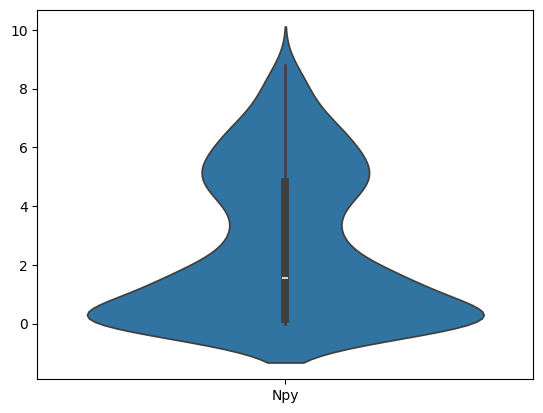

In [ ]:
# create violin plot of gene table

import seaborn as sns

sns.violinplot(data=gene_table)
plt.show()


# (MS) ADDITIONAL FUNCTIONS

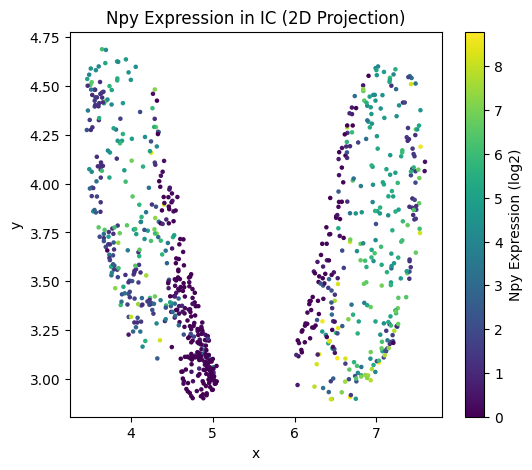

In [ ]:
# 2D spatial plot (Npy))
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sc = plt.scatter(
    cell_table['x_reconstructed'],
    cell_table['y_reconstructed'],
    c=cell_table['Npy'], # Edit to match gene
    cmap='viridis',
    s=5
)
plt.colorbar(sc, label='Npy Expression (log2)') # Edit
plt.xlabel('x')
plt.ylabel('y')
plt.title('Npy Expression in IC (2D Projection)') # Edit
plt.show()

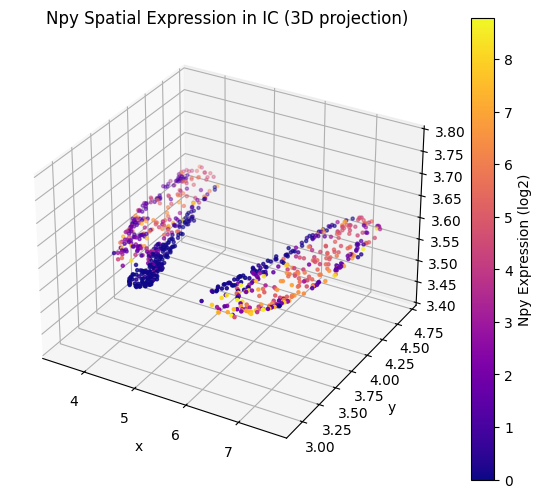

In [ ]:
# 3D Spatial Plot (Npy)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(
    cell_table['x_reconstructed'],
    cell_table['y_reconstructed'],
    cell_table['z_reconstructed'],
    c=cell_table['Npy'], #Edit
    cmap='plasma',
    s=5
)
fig.colorbar(p, label='Npy Expression (log2)') #Edit
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Npy Spatial Expression in IC (3D projection)') #Edit
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


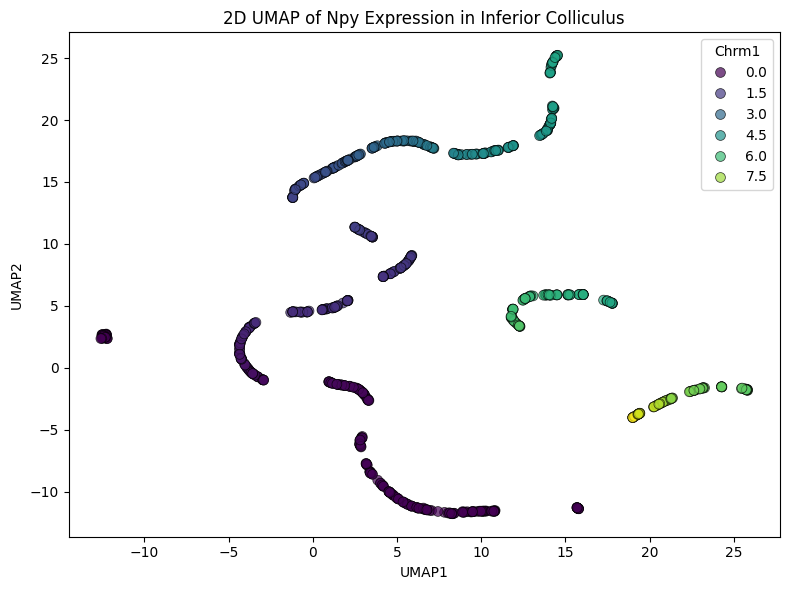

In [ ]:
#UMAP
# Required packages
import umap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Specify target brain region and genes
target_region = "IC"  # This must match how the region is labeled in 'parcellation_structure'
gene_list = ['Npy']  # genes of interest

# Step 2: Filter cells for Inferior Colliculus only
ic_cells = cell_table[cell_table['parcellation_structure'] == target_region]

# Step 3: Check and extract valid genes from data
available_genes = [gene for gene in gene_list if gene in ic_cells.columns]
if len(available_genes) < len(gene_list):
    print("Warning: Some genes not found in cell_table:", set(gene_list) - set(available_genes))

gene_data = ic_cells[available_genes]

# Step 4: Run UMAP dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(gene_data)

# Step 5: Create UMAP output DataFrame
umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
umap_df[available_genes] = gene_data.reset_index(drop=True)

# Step 6: Plot the UMAP, colored by one gene (e.g., Chrm1)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='UMAP1', y='UMAP2',
    data=umap_df,
    hue='Npy',  # Change this to another gene if desired
    palette='viridis',
    s=50,
    edgecolor='k',
    alpha=0.7
)
plt.title(f"2D UMAP of {', '.join(available_genes)} Expression in Inferior Colliculus") # Change basedon brain region
plt.legend(title='Chrm1')
plt.tight_layout()
plt.show()

# NPY and Cholingeric Co-Expression

Muscarinic (Chrm1, Chrm2, Chrm3, Chrm5)

Goal: Upload CSV files of both Muscarinic and Npy cells, and then look for overlap.

In [ ]:
# Upload files, and compare
# Step 1: Upload CSV files
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()  # Use this to upload local files

# Step 2: Load CSVs into dataframe
# Load CSVs
muscarinic_df = pd.read_csv('250528_muscarnic_gene_table.csv')
npy_df = pd.read_csv('250529_Npy_gene_table.csv')


Saving 250529_Npy_gene_table.csv to 250529_Npy_gene_table (1).csv
Saving 250528_muscarnic_gene_table.csv to 250528_muscarnic_gene_table (1).csv


In [ ]:
# Compare Uploaded files by Cell ID
# Make sure the cell ID column is named consistently
muscarinic_cells = set(muscarinic_df['cell_label'])
npy_cells = set(npy_df['cell_label'])

# Find overlapping cells
overlap = muscarinic_cells & npy_cells

# Summary
print(f"Muscarinic+ cells: {len(muscarinic_cells)}")
print(f"Npy+ cells: {len(npy_cells)}")
print(f"Overlap: {len(overlap)} cells")

# Optional: Save the overlapping cells to a new CSV
pd.DataFrame({'cell_label': list(overlap)}).to_csv('muscarinic_npy_overlap.csv', index=False)

Muscarinic+ cells: 815
Npy+ cells: 815
Overlap: 815 cells


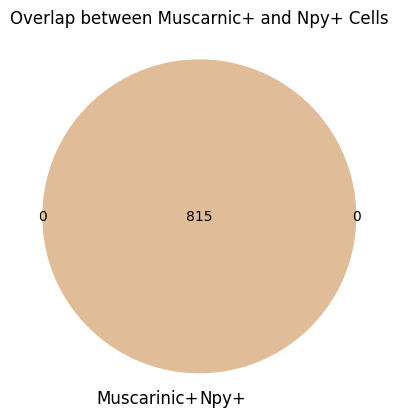

In [ ]:
#Visualization of ALL muscaranic and NPY overlap (Venn-Diagram)

!pip install matplotlib-venn

from matplotlib_venn import venn2
import matplotlib.pyplot as plt

venn2([muscarinic_cells, npy_cells], set_labels=('Muscarinic+', 'Npy+'))
plt.title("Overlap between Muscarnic+ and Npy+ Cells")
plt.show()

Seperating Muscarinic Cells

In [ ]:
# Uploading Files

# Step 1: Upload and Load CSVs
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

# Read CSVs
muscarinic_df = pd.read_csv("250528_muscarnic_gene_table.csv")  # contains Chrm1, Chrm2, Chrm3, Chrm5 expression
npy_df = pd.read_csv("250529_Npy_gene_table.csv")  # contains NPY+ cells

# Get NPY cell IDs
npy_cells = set(npy_df['cell_label'])


Saving 250529_Npy_gene_table.csv to 250529_Npy_gene_table (5).csv
Saving 250528_muscarnic_gene_table.csv to 250528_muscarnic_gene_table (5).csv


In [ ]:
# Splitting muscarinic data into individual gene groups
# Dictionary to hold Chrm gene+ cell sets
muscarinic_genes = ['Chrm1', 'Chrm2', 'Chrm3', 'Chrm5']
muscarinic_cells = {}

# For each gene, get cells with non-zero expression
for gene in muscarinic_genes:
    gene_cells = muscarinic_df[muscarinic_df[gene] > 0]['cell_label']
    muscarinic_cells[gene] = set(gene_cells)

In [ ]:
# Compute overlap

overlap_counts = {}

for gene, gene_cells in muscarinic_cells.items():
    overlap = gene_cells & npy_cells
    overlap_counts[gene] = {
        'total_gene_cells': len(gene_cells),
        'total_npy_cells': len(npy_cells),
        'overlap': len(overlap)
    }

# Display results
pd.DataFrame(overlap_counts).T

,total_gene_cells,total_npy_cells,overlap
Chrm1,563,815,563
Chrm2,815,815,815
Chrm3,815,815,815
Chrm5,478,815,478


from matplotlib import pyplot as plt
_df_0['total_gene_cells'].plot(kind='hist', bins=20, title='total_gene_cells')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['overlap'].plot(kind='hist', bins=20, title='overlap')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='total_gene_cells', y='overlap', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['total_npy_cells']
  ys = series['total_gene_cells']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('total_npy_cells', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_npy_cells')
_ = plt.ylabel('total_gene_cells')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['total_npy_cells']
  ys = series['overlap']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('total_npy_cells', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_npy_cells')
_ = plt.ylabel('overlap')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['total_npy_cells']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'total_npy_cells'}, axis=1)
              .sort_values('total_npy_cells', ascending=True))
  xs = counted['total_npy_cells']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('total_npy_cells', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('total_npy_cells')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['total_gene_cells'].plot(kind='line', figsize=(8, 4), title='total_gene_cells')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['overlap'].plot(kind='line', figsize=(8, 4), title='overlap')
plt.gca().spines[['top', 'right']].set_visible(False)

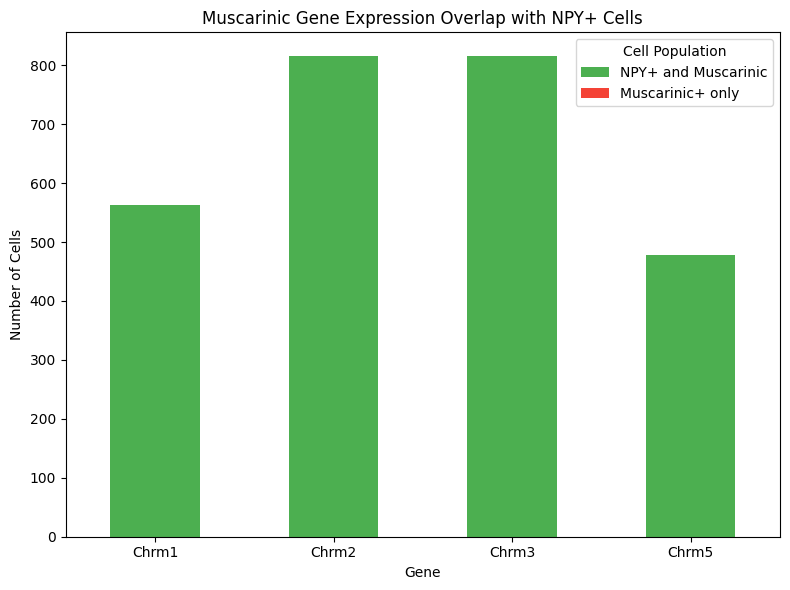

In [ ]:
# Visualzing with Bar Plot
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

# STEP 1: Prepare data for plotting
# Create lists to hold data for the DataFrame
genes_for_plot = []
npy_overlap_counts = []
no_npy_counts = []

for gene, counts in overlap_counts.items():
    genes_for_plot.append(gene)
    npy_overlap_counts.append(counts['overlap'])
    # Calculate cells expressing the muscarinic gene but not Npy+
    no_npy_counts.append(counts['total_gene_cells'] - counts['overlap'])

# Create DataFrame for plotting
plot_df = pd.DataFrame({
    'NPY+ and Muscarinic': npy_overlap_counts,
    'Muscarinic+ only': no_npy_counts
}, index=genes_for_plot) # Set genes as the index

# STEP 2: Plot stacked bar chart with COLORS
plot_df.plot(
    kind="bar",
    stacked=True,
    color=["#4CAF50", "#F44336"],  # green for overlap, red for non-overlap
    figsize=(8,6)
)

plt.title("Muscarinic Gene Expression Overlap with NPY+ Cells")
plt.ylabel("Number of Cells")
plt.xlabel("Gene")
plt.legend(title='Cell Population')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Merging overlapping cells
import pandas as pd

# Load the two datasets (replace with your actual file names if needed)
muscarinic_df = pd.read_csv("250528_muscarnic_gene_table.csv")
npy_df = pd.read_csv("250529_Npy_gene_table.csv")

# Merge on shared cells using inner join
merged_overlap_df = pd.merge(muscarinic_df, npy_df, on='cell_label', how='inner')

# Save the overlapped cells to a new CSV
merged_overlap_df.to_csv("muscarinic_npy_overlap.csv", index=False)

print(f"Merged and saved {len(merged_overlap_df)} overlapping cells to 'muscarinic_npy_overlap.csv'")

Merged and saved 815 overlapping cells to 'muscarinic_npy_overlap.csv'


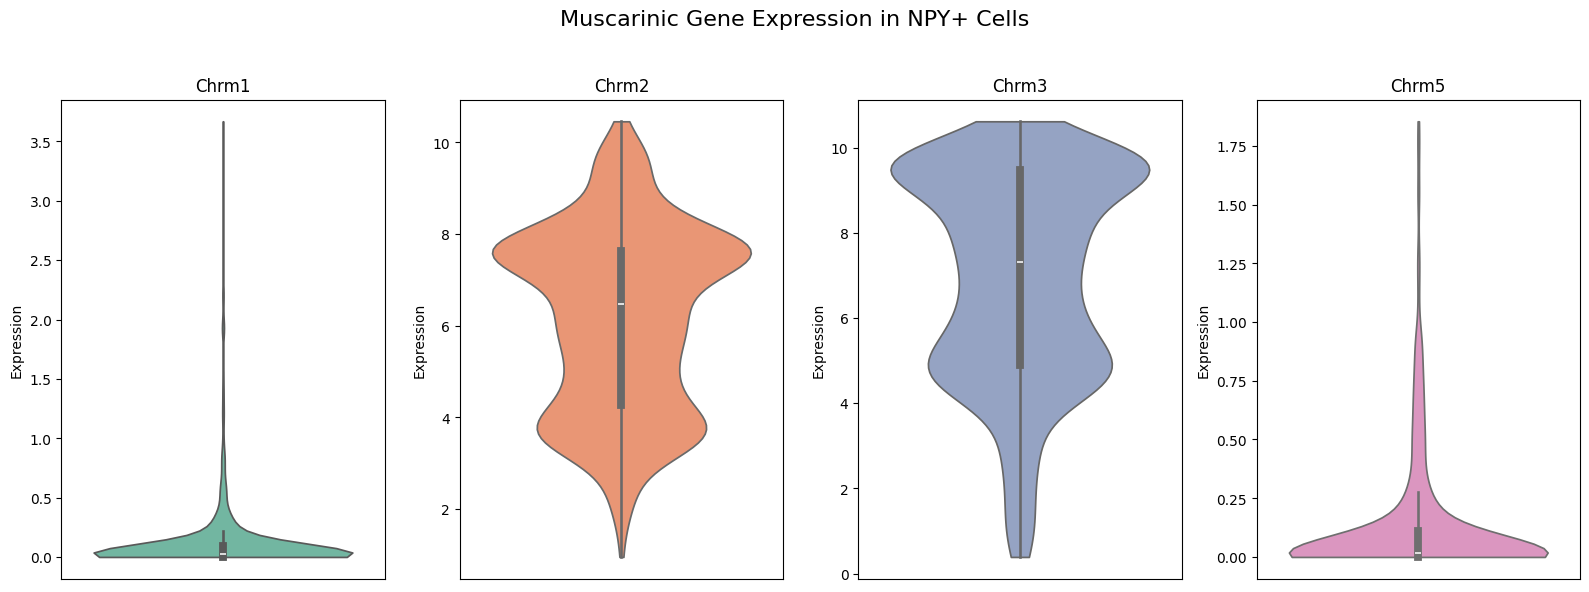

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your merged dataset
df = pd.read_csv("muscarinic_npy_overlap.csv")

# Add a dummy column to indicate NPY+ status (all cells are NPY+ in this merged df)
df['NPY_status'] = 'NPY+'

# List of muscarinic genes and associated colors
muscarinic_genes = ['Chrm1', 'Chrm2', 'Chrm3', 'Chrm5']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']  # Customize as needed

# Plot violin plots
plt.figure(figsize=(16, 6))
for i, (gene, color) in enumerate(zip(muscarinic_genes, colors)):
    plt.subplot(1, 4, i + 1)
    sns.violinplot(data=df, x='NPY_status', y=gene, color=color, cut=0)
    plt.title(gene)
    plt.xlabel('')
    plt.ylabel('Expression')
    plt.xticks([])  # Hide x-axis tick labels since there's only one category

plt.suptitle('Muscarinic Gene Expression in NPY+ Cells', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


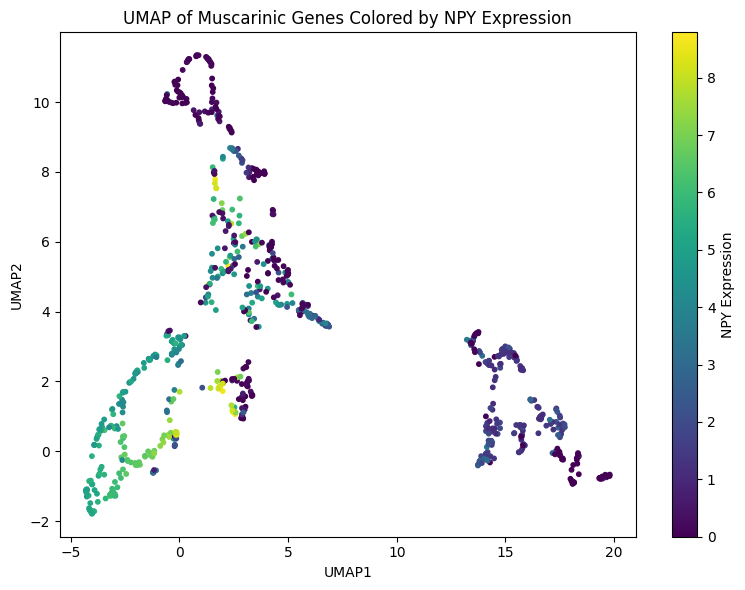

In [ ]:
# UMAP of muscarinic gene expression in NPY+ cells

import umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your full dataset (should include muscarinic genes + Npy column)
df = pd.read_csv("muscarinic_npy_overlap.csv")  # Replace with your actual filename

# Define gene names (adjust if your columns differ)
muscarinic_genes = ['Chrm1', 'Chrm2', 'Chrm3', 'Chrm5']

# Confirm required columns are present
required_columns = muscarinic_genes + ['Npy']
missing = [col for col in required_columns if col not in df.columns]
if missing:
    raise ValueError(f"Missing columns in your dataset: {missing}")

# Run UMAP on muscarinic genes only
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df[muscarinic_genes])

# Prepare a DataFrame for plotting
umap_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
umap_df["Npy_expression"] = df["Npy"]

# Plot UMAP with NPY expression overlaid
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    umap_df["UMAP1"], umap_df["UMAP2"],
    c=umap_df["Npy_expression"],
    cmap="viridis", s=10
)
plt.colorbar(sc, label="NPY Expression")
plt.title("UMAP of Muscarinic Genes Colored by NPY Expression")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-103-08fee203baa5>:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Leave space for colorbar and title


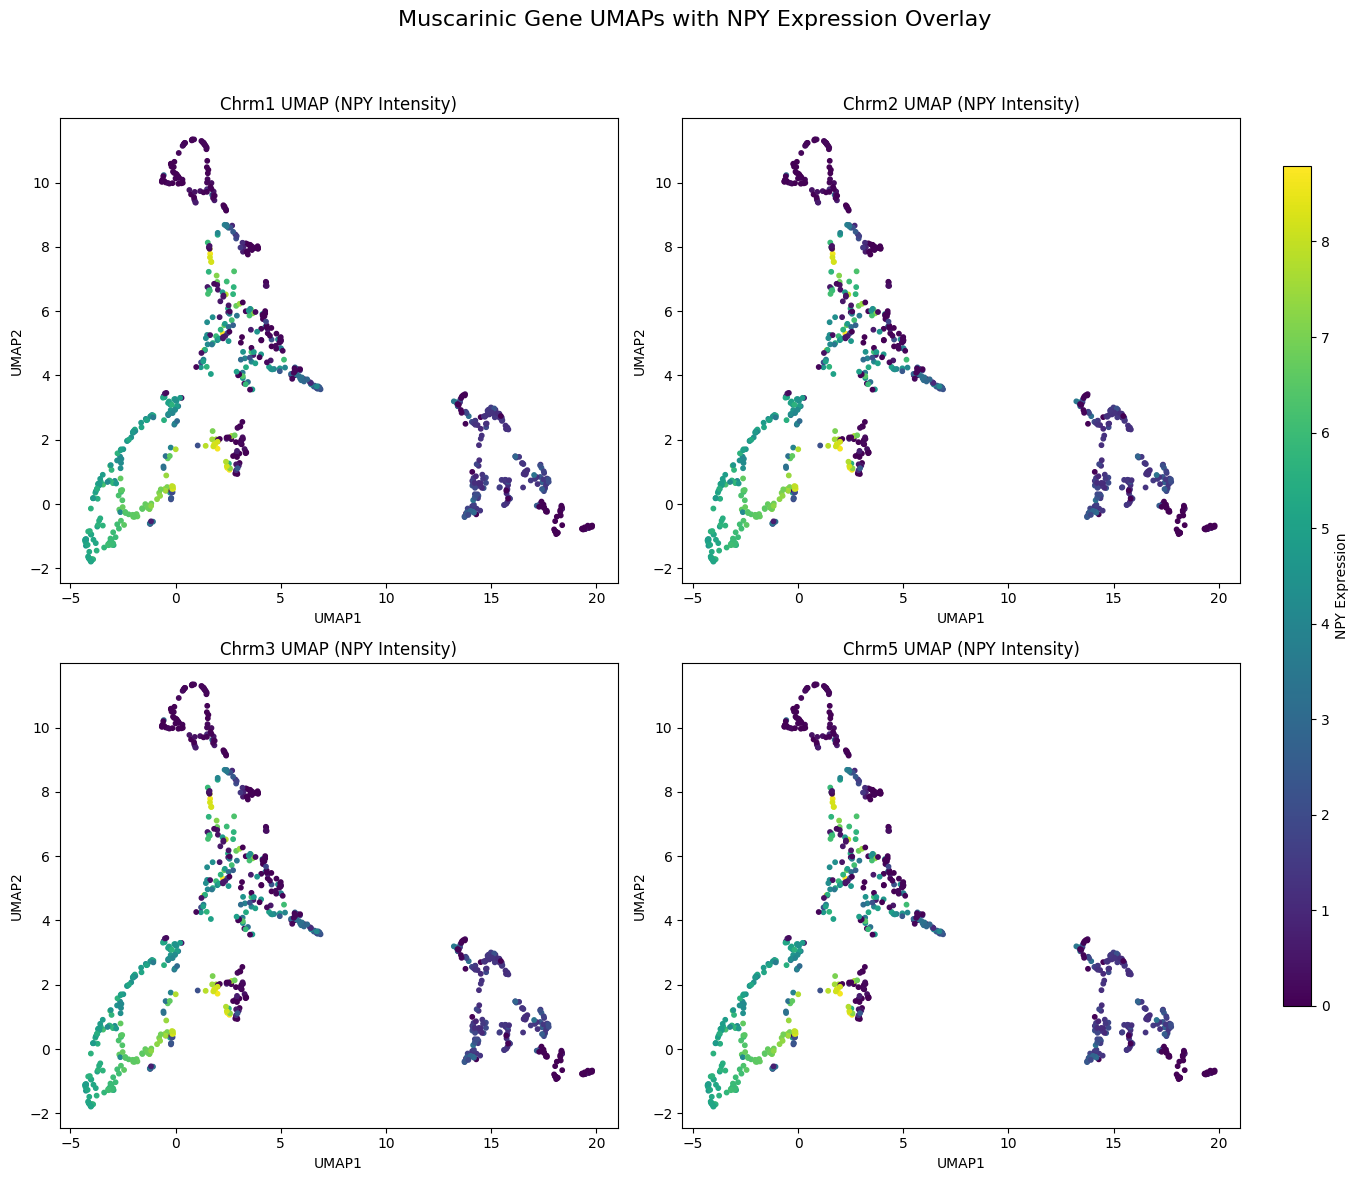

In [ ]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (ensure it contains muscarinic genes and NPY)
df = pd.read_csv("muscarinic_npy_overlap.csv")  # Replace with actual file

# Muscarinic genes and NPY
muscarinic_genes = ['Chrm1', 'Chrm2', 'Chrm3', 'Chrm5']
npy_gene = 'Npy'

# Confirm all columns exist
required = muscarinic_genes + [npy_gene]
missing = [col for col in required if col not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")

# UMAP embedding based on muscarinic gene expression
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df[muscarinic_genes])

# UMAP results DataFrame
umap_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
umap_df[npy_gene] = df[npy_gene]

# Set up 2x2 grid and colorbar space
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Normalize color scale across all plots
vmin = umap_df[npy_gene].min()
vmax = umap_df[npy_gene].max()

# Create plots
for i, gene in enumerate(muscarinic_genes):
    sc = axes[i].scatter(
        umap_df["UMAP1"], umap_df["UMAP2"],
        c=umap_df[npy_gene], cmap='viridis',
        s=10, vmin=vmin, vmax=vmax
    )
    axes[i].set_title(f"{gene} UMAP (NPY Intensity)")
    axes[i].set_xlabel("UMAP1")
    axes[i].set_ylabel("UMAP2")

# Add a single colorbar to the right
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sc, cax=cbar_ax)
cbar.set_label("NPY Expression")

plt.suptitle("Muscarinic Gene UMAPs with NPY Expression Overlay", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Leave space for colorbar and title
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs val

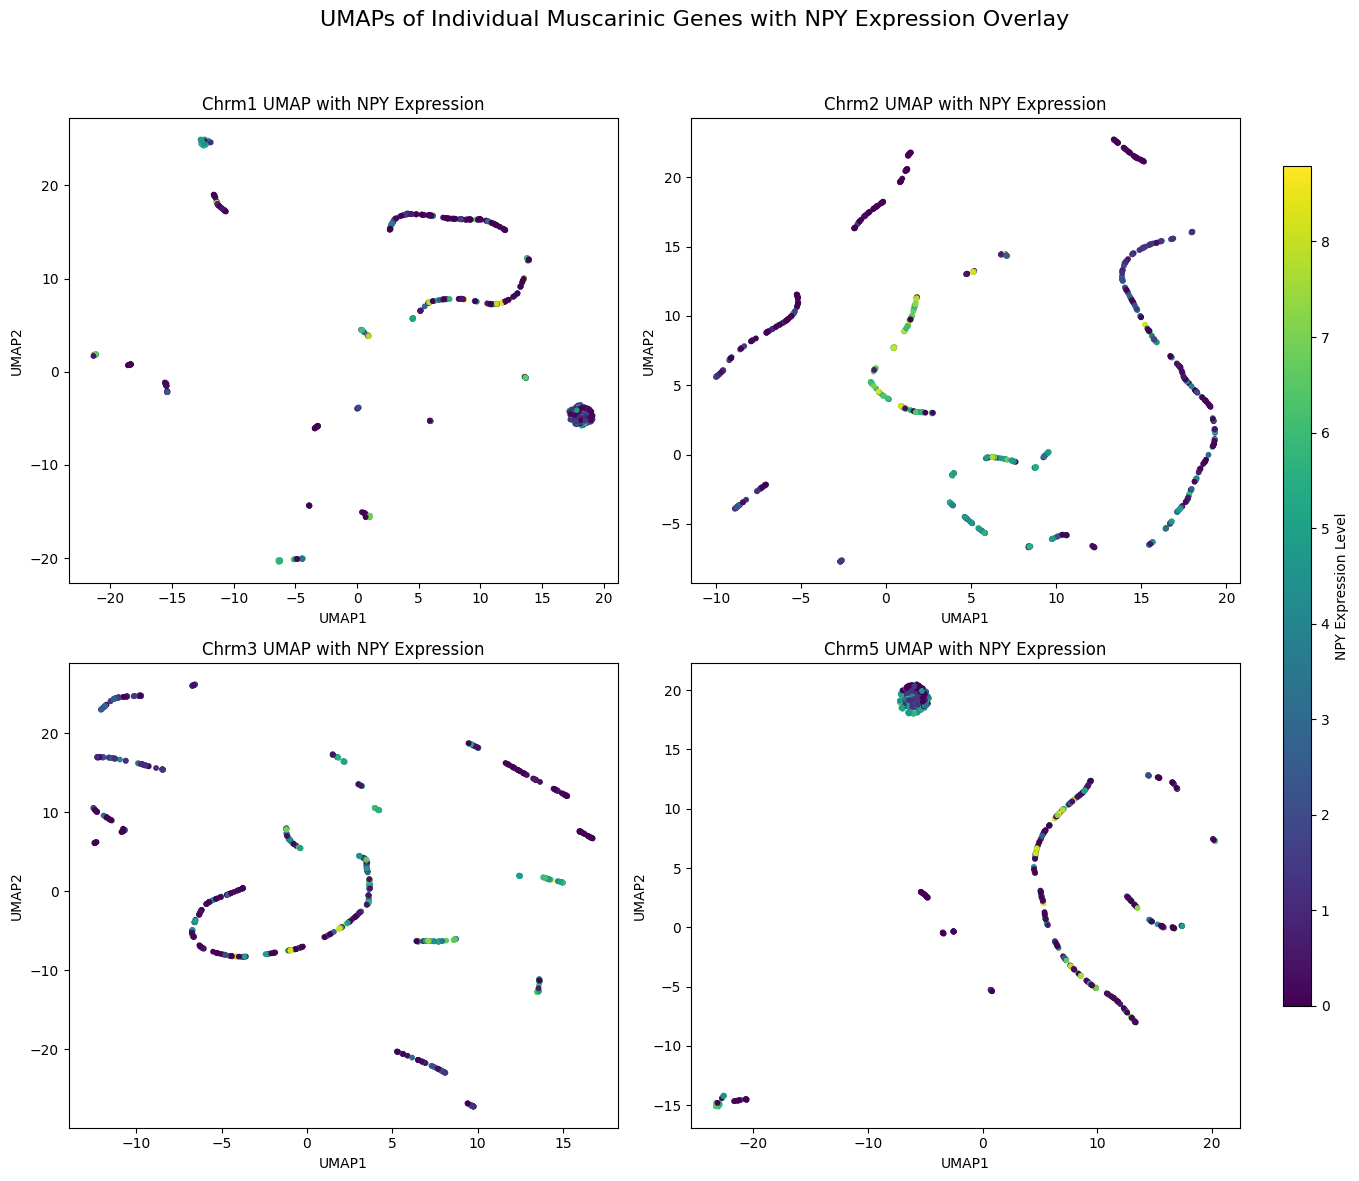

In [ ]:
import umap
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("muscarinic_npy_overlap.csv")  # Replace with your file

# Genes of interest
muscarinic_genes = ['Chrm1', 'Chrm2', 'Chrm3', 'Chrm5']
npy_gene = 'Npy'

# Set up figure
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Normalize NPY color scale
vmin = df[npy_gene].min()
vmax = df[npy_gene].max()

# Loop through each muscarinic gene
for i, gene in enumerate(muscarinic_genes):
    # Run UMAP on the expression of a single gene (reshape to 2D)
    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(df[[gene]])

    # Plot with NPY expression as color
    sc = axes[i].scatter(
        embedding[:, 0], embedding[:, 1],
        c=df[npy_gene], cmap='viridis', s=10,
        vmin=vmin, vmax=vmax
    )
    axes[i].set_title(f"{gene} UMAP with NPY Expression")
    axes[i].set_xlabel("UMAP1")
    axes[i].set_ylabel("UMAP2")

# Add one colorbar to the right
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(sc, cax=cbar_ax)
cbar.set_label("NPY Expression Level")

plt.suptitle("UMAPs of Individual Muscarinic Genes with NPY Expression Overlay", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

<ipython-input-109-531aa6f62c23>:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


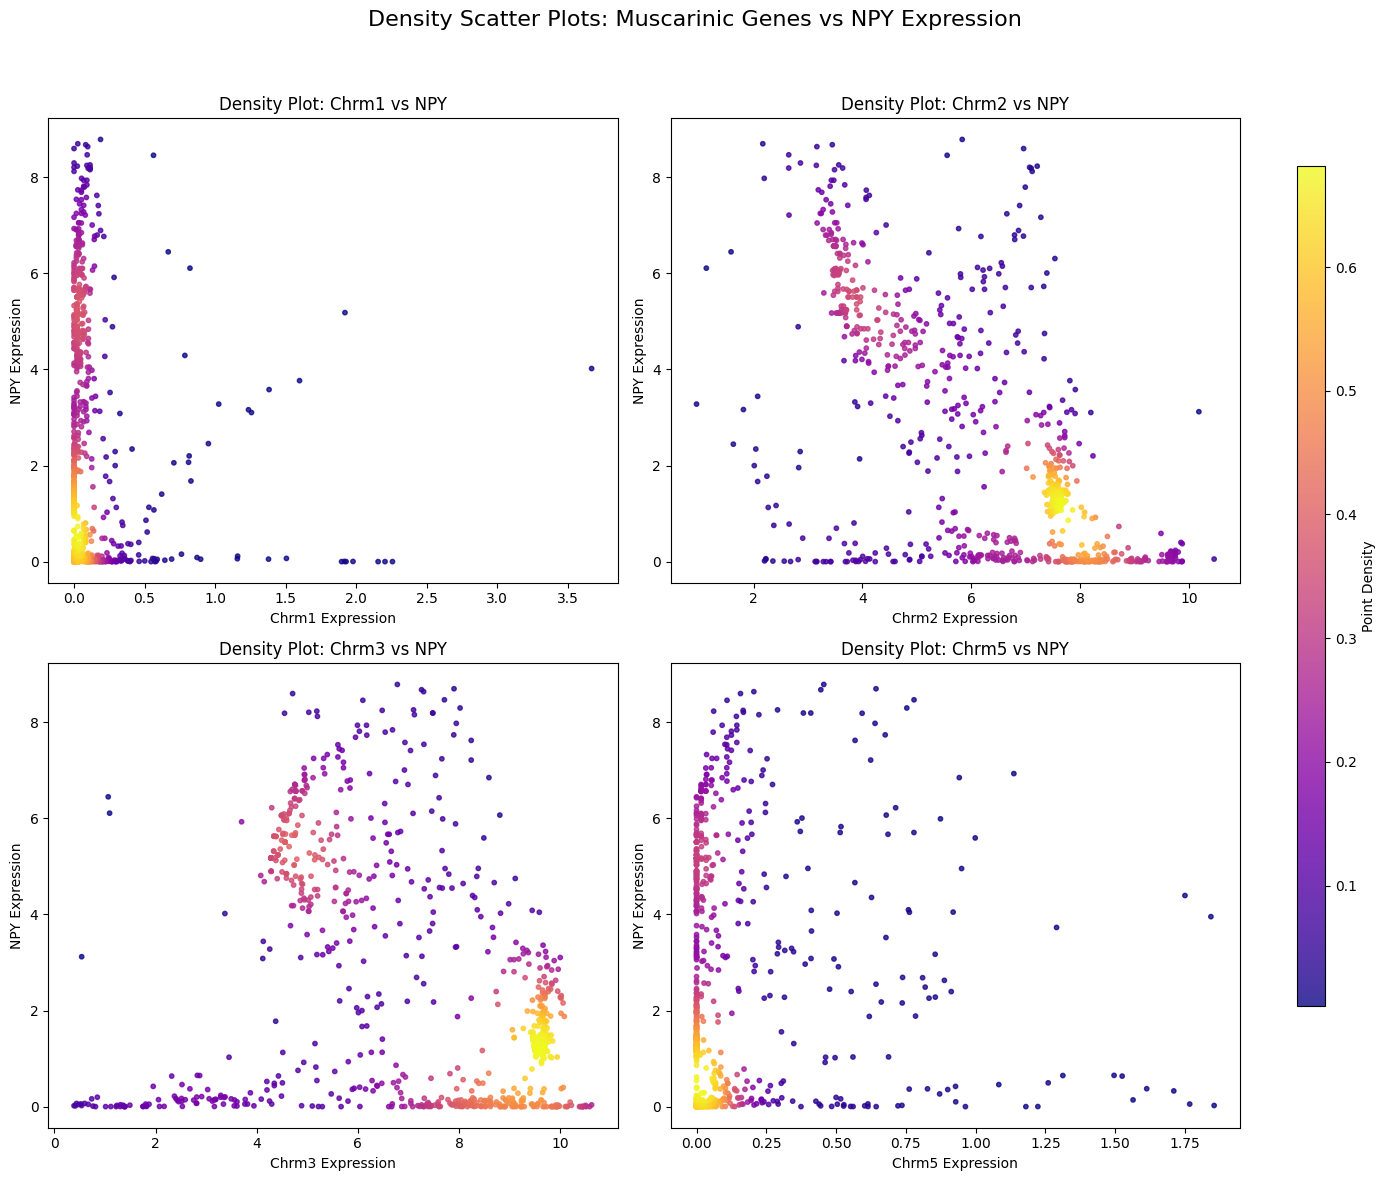

In [ ]:
# Density
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load your dataset
df = pd.read_csv("muscarinic_npy_overlap.csv")  # Replace with your file
muscarinic_genes = ['Chrm1', 'Chrm2', 'Chrm3', 'Chrm5']
npy_gene = 'Npy'

# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, gene in enumerate(muscarinic_genes):
    x = df[gene].values
    y = df[npy_gene].values

    # Calculate point density
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    # Sort points by density for better visual layering
    idx = z.argsort()
    x, y, z, npy = x[idx], y[idx], z[idx], df[npy_gene].values[idx]

    # Plot
    sc = axes[i].scatter(x, y, c=z, cmap='plasma', s=10, alpha=0.8)
    axes[i].set_title(f'Density Plot: {gene} vs NPY')
    axes[i].set_xlabel(f'{gene} Expression')
    axes[i].set_ylabel('NPY Expression')

# Add shared colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
fig.colorbar(sc, cax=cbar_ax, label='Point Density')

plt.suptitle("Density Scatter Plots: Muscarinic Genes vs NPY Expression", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

<ipython-input-110-6adbdb0101d1>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_matrix = heatmap_data.groupby([gene, npy_gene]).size().unstack().fillna(0)
<ipython-input-110-6adbdb0101d1>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_matrix = heatmap_data.groupby([gene, npy_gene]).size().unstack().fillna(0)
<ipython-input-110-6adbdb0101d1>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_matrix 

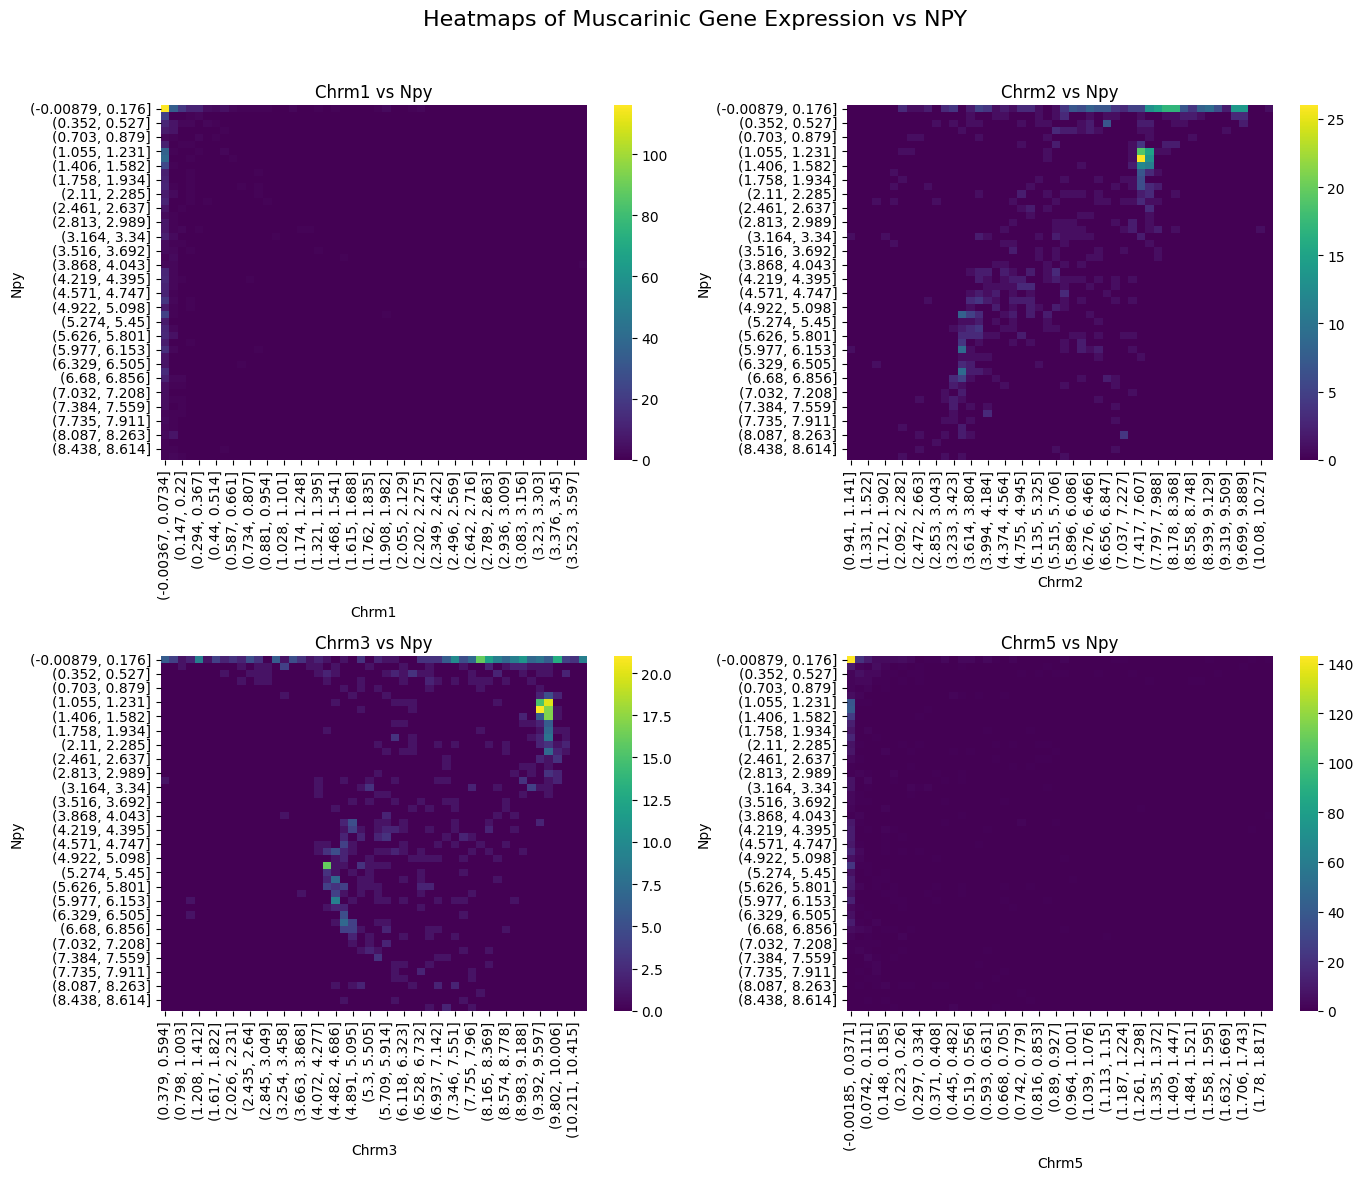

In [110]:
# Heat map
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("muscarinic_npy_overlap.csv")  # Replace with your actual dataset path

# Genes to compare
muscarinic_genes = ['Chrm1', 'Chrm2', 'Chrm3', 'Chrm5']
npy_gene = 'Npy'

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Plot a heatmap for each muscarinic gene
for i, gene in enumerate(muscarinic_genes):
    # Bin data using 2D histogram and pivot for heatmap
    heatmap_data = pd.DataFrame({
        gene: pd.cut(df[gene], bins=50),
        npy_gene: pd.cut(df[npy_gene], bins=50)
    })
    count_matrix = heatmap_data.groupby([gene, npy_gene]).size().unstack().fillna(0)

    # Plot heatmap
    sns.heatmap(count_matrix.T, ax=axes[i], cmap='viridis')
    axes[i].set_title(f'{gene} vs {npy_gene}')
    axes[i].set_xlabel(gene)
    axes[i].set_ylabel(npy_gene)

plt.suptitle("Heatmaps of Muscarinic Gene Expression vs NPY", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()